##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [1]:
#%pip install pandas 
#%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [2]:
# Can have as many cells as you want for code
import pandas as pd
filepath = "./data/catB_train.parquet" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [3]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
import sklearn

In [4]:
tb = pq.read_table(filepath)
df = tb.to_pandas()
df.head()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
df.columns.tolist()
df.dtypes

clntnum                               object
race_desc                             object
ctrycode_desc                         object
clttype                               object
stat_flag                             object
min_occ_date                          object
cltdob_fix                            object
cltsex_fix                            object
flg_substandard                      float64
flg_is_borderline_standard           float64
flg_is_revised_term                  float64
flg_is_rental_flat                   float64
flg_has_health_claim                 float64
flg_has_life_claim                   float64
flg_gi_claim                         float64
flg_is_proposal                      float64
flg_with_preauthorisation            float64
flg_is_returned_mail                 float64
is_consent_to_mail                   float64
is_consent_to_email                  float64
is_consent_to_call                   float64
is_consent_to_sms                    float64
is_valid_d

In [6]:
df["f_purchase_lh"] = df["f_purchase_lh"].fillna(0)
df["f_purchase_lh"].unique()

array([0., 1.])

In [7]:
df["min_occ_date"] = pd.to_datetime(df["min_occ_date"], format="%Y-%m-%d", errors="coerce")
df["cltdob_fix"] = pd.to_datetime(df["cltdob_fix"], format="%Y-%m-%d", errors="coerce")

df["hh_20"] = pd.to_numeric(df["hh_20"], errors='coerce')
df["hh_20"] = df["hh_20"].astype('Int64')

df["pop_20"] = pd.to_numeric(df["pop_20"], errors='coerce')
df["pop_20"] = df["pop_20"].astype('Int64')

df["hh_size_est"] = pd.to_numeric(df["hh_size_est"], errors='coerce')
df["hh_size_est"] = df["hh_size_est"].astype('Int64')


In [8]:
prod_cols = ['ape_gi_42e115',
 'ape_ltc_1280bf',
 'ape_grp_6fc3e6',
 'ape_grp_de05ae',
 'ape_inv_dcd836',
 'ape_grp_945b5a',
 'ape_grp_6a5788',
 'ape_ltc_43b9d5',
 'ape_grp_9cdedf',
 'ape_lh_d0adeb',
 'ape_grp_1581d7',
 'ape_grp_22decf',
 'ape_lh_507c37',
 'ape_lh_839f8a',
 'ape_inv_e9f316',
 'ape_gi_a10d1b',
 'ape_gi_29d435',
 'ape_grp_caa6ff',
 'ape_grp_fd3bfb',
 'ape_lh_e22a6a',
 'ape_grp_70e1dd',
 'ape_grp_e04c3a',
 'ape_grp_fe5fb8',
 'ape_gi_856320',
 'ape_grp_94baec',
 'ape_gi_058815',
 'ape_grp_e91421',
 'ape_lh_f852af',
 'ape_lh_947b15',
 'ape_32c74c',
 'sumins_gi_42e115',
 'sumins_ltc_1280bf',
 'sumins_grp_6fc3e6',
 'sumins_grp_de05ae',
 'sumins_inv_dcd836',
 'sumins_grp_945b5a',
 'sumins_grp_6a5788',
 'sumins_ltc_43b9d5',
 'sumins_grp_9cdedf',
 'sumins_lh_d0adeb',
 'sumins_grp_1581d7',
 'sumins_grp_22decf',
 'sumins_lh_507c37',
 'sumins_inv_e9f316',
 'sumins_gi_a10d1b',
 'sumins_gi_29d435',
 'sumins_grp_caa6ff',
 'sumins_grp_fd3bfb',
 'sumins_lh_e22a6a',
 'sumins_grp_70e1dd',
 'sumins_grp_e04c3a',
 'sumins_grp_fe5fb8',
 'sumins_gi_856320',
 'sumins_grp_94baec',
 'sumins_gi_058815',
 'sumins_grp_e91421',
 'sumins_lh_f852af',
 'sumins_lh_947b15',
 'sumins_32c74c',
 'prempaid_gi_42e115',
 'prempaid_ltc_1280bf',
 'prempaid_grp_6fc3e6',
 'prempaid_grp_de05ae',
 'prempaid_inv_dcd836',
 'prempaid_grp_945b5a',
 'prempaid_grp_6a5788',
 'prempaid_ltc_43b9d5',
 'prempaid_grp_9cdedf',
 'prempaid_lh_d0adeb',
 'prempaid_grp_1581d7',
 'prempaid_grp_22decf',
 'prempaid_lh_507c37',
 'prempaid_lh_839f8a',
 'prempaid_inv_e9f316',
 'prempaid_gi_a10d1b',
 'prempaid_gi_29d435',
 'prempaid_grp_caa6ff',
 'prempaid_grp_fd3bfb',
 'prempaid_lh_e22a6a',
 'prempaid_grp_70e1dd',
 'prempaid_grp_e04c3a',
 'prempaid_grp_fe5fb8',
 'prempaid_gi_856320',
 'prempaid_grp_94baec',
 'prempaid_gi_058815',
 'prempaid_grp_e91421',
 'prempaid_lh_f852af',
 'prempaid_lh_947b15',
 'prempaid_32c74c',
 'ape_839f8a',
 'ape_e22a6a',
 'ape_d0adeb',
 'ape_c4bda5',
 'ape_ltc',
 'ape_507c37',
 'ape_gi',
 'f_hold_839f8a',
 'f_hold_e22a6a',
 'f_hold_d0adeb',
 'f_hold_c4bda5',
 'f_hold_ltc',
 'f_hold_507c37',
 'f_hold_gi',
 'sumins_839f8a',
 'sumins_e22a6a',
 'sumins_d0adeb',
 'sumins_c4bda5',
 'sumins_ltc',
 'sumins_507c37',
 'sumins_gi',
 'prempaid_839f8a',
 'prempaid_e22a6a',
 'prempaid_d0adeb',
 'prempaid_c4bda5',
 'prempaid_ltc',
 'prempaid_507c37',
 'prempaid_gi',
 'lapse_ape_ltc_1280bf',
 'lapse_ape_grp_6fc3e6',
 'lapse_ape_grp_de05ae',
 'lapse_ape_inv_dcd836',
 'lapse_ape_grp_945b5a',
 'lapse_ape_grp_6a5788',
 'lapse_ape_ltc_43b9d5',
 'lapse_ape_grp_9cdedf',
 'lapse_ape_lh_d0adeb',
 'lapse_ape_grp_1581d7',
 'lapse_ape_grp_22decf',
 'lapse_ape_lh_507c37',
 'lapse_ape_lh_839f8a',
 'lapse_ape_inv_e9f316',
 'lapse_ape_grp_caa6ff',
 'lapse_ape_grp_fd3bfb',
 'lapse_ape_lh_e22a6a',
 'lapse_ape_grp_70e1dd',
 'lapse_ape_grp_e04c3a',
 'lapse_ape_grp_fe5fb8',
 'lapse_ape_grp_94baec',
 'lapse_ape_grp_e91421',
 'lapse_ape_lh_f852af',
 'lapse_ape_lh_947b15',
 'lapse_ape_32c74c',
] #change to float64

df[prod_cols] = df[prod_cols].astype('float64')
df[["recency_lapse", "recency_cancel", "tot_inforce_pols"]] = df[["recency_lapse", "recency_cancel", "tot_inforce_pols"]].apply(pd.to_numeric, errors='coerce')
df[["recency_lapse", "recency_cancel", "tot_inforce_pols"]] = df[["recency_lapse", "recency_cancel", "tot_inforce_pols"]].astype('Int64')


In [9]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['annual_income_est', 'race_desc',
 'ctrycode_desc',
 'clttype',
 'stat_flag', 
 'cltsex_fix']

def encode_column_with_missing_values(df, column_name):
    # Extract rows with missing values in the specified column
    df_missing = df[df[column_name].isna()]

    # Drop rows with missing values in the specified column
    df_cleaned = df.dropna(subset=[column_name])

    # Extract and encode the specified column
    column_to_encode = df_cleaned[[column_name]]
    oe = OrdinalEncoder()
    column_encoded = oe.fit_transform(column_to_encode)
    df_cleaned[column_name] = column_encoded

    # Concatenate the two parts back together
    df_result = pd.concat([df_cleaned, df_missing], ignore_index=True)

    return df_result

for col in ordinal_cols:
    df = encode_column_with_missing_values(df, col)

C:\Users\User\AppData\Local\Temp\ipykernel_18572\750366996.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column_name] = column_encoded
C:\Users\User\AppData\Local\Temp\ipykernel_18572\750366996.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column_name] = column_encoded
C:\Users\User\AppData\Local\Temp\ipykernel_18572\750366996.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [10]:
df = df.infer_objects()

In [11]:
#145-158 obj to float
cols_145_to_158 = ['sumins_839f8a',
 'sumins_e22a6a',
 'sumins_d0adeb',
 'sumins_c4bda5',
 'sumins_ltc',
 'sumins_507c37',
 'sumins_gi',
 'prempaid_839f8a',
 'prempaid_e22a6a',
 'prempaid_d0adeb',
 'prempaid_c4bda5',
 'prempaid_ltc',
 'prempaid_507c37',
 'prempaid_gi']

df[cols_145_to_158] = df[cols_145_to_158].apply(pd.to_numeric, errors='coerce')
df[cols_145_to_158] = df[cols_145_to_158].astype(float)

cols_months_snce_bought = [ 'n_months_since_lapse_ltc_1280bf',
 'n_months_since_lapse_grp_6fc3e6',
 'n_months_since_lapse_grp_de05ae',
 'n_months_since_lapse_inv_dcd836',
 'n_months_since_lapse_grp_945b5a',
 'n_months_since_lapse_grp_6a5788',
 'n_months_since_lapse_ltc_43b9d5',
 'n_months_since_lapse_grp_9cdedf',
 'n_months_since_lapse_lh_d0adeb',
 'n_months_since_lapse_grp_1581d7',
 'n_months_since_lapse_grp_22decf',
 'n_months_since_lapse_lh_507c37',
 'n_months_since_lapse_lh_839f8a',
 'n_months_since_lapse_inv_e9f316',
 'n_months_since_lapse_grp_caa6ff',
 'n_months_since_lapse_grp_fd3bfb',
 'n_months_since_lapse_lh_e22a6a',
 'n_months_since_lapse_grp_70e1dd',
 'n_months_since_lapse_grp_e04c3a',
 'n_months_since_lapse_grp_fe5fb8',
 'n_months_since_lapse_grp_94baec',
 'n_months_since_lapse_grp_e91421',
 'n_months_since_lapse_lh_f852af',
 'n_months_since_lapse_lh_947b15',
 'n_months_since_lapse_32c74c', 
  'n_months_last_bought_839f8a',
 'n_months_last_bought_e22a6a',
 'n_months_last_bought_d0adeb',
 'n_months_last_bought_c4bda5',
 'n_months_last_bought_ltc',
 'n_months_last_bought_507c37',
 'n_months_last_bought_gi',
  'n_months_last_bought_ltc_1280bf',
 'n_months_last_bought_grp_6fc3e6',
 'n_months_last_bought_grp_de05ae',
 'n_months_last_bought_inv_dcd836',
 'n_months_last_bought_grp_945b5a',
 'n_months_last_bought_grp_6a5788',
 'n_months_last_bought_ltc_43b9d5',
 'n_months_last_bought_grp_9cdedf',
 'n_months_last_bought_lh_d0adeb',
 'n_months_last_bought_grp_1581d7',
 'n_months_last_bought_grp_22decf',
 'n_months_last_bought_lh_507c37',
 'n_months_last_bought_lh_839f8a',
 'n_months_last_bought_inv_e9f316',
 'n_months_last_bought_grp_caa6ff',
 'n_months_last_bought_grp_fd3bfb',
 'n_months_last_bought_lh_e22a6a',
 'n_months_last_bought_grp_70e1dd',
 'n_months_last_bought_grp_e04c3a',
 'n_months_last_bought_grp_fe5fb8',
 'n_months_last_bought_grp_94baec',
 'n_months_last_bought_grp_e91421',
 'n_months_last_bought_lh_f852af',
 'n_months_last_bought_lh_947b15',
 'n_months_last_bought_32c74c']

df[cols_months_snce_bought] = df[cols_months_snce_bought].apply(pd.to_numeric, errors='coerce')
df[cols_months_snce_bought] = df[cols_months_snce_bought].astype('Int64')

In [12]:
col_276_283 = [
    'flg_affconnect_show_interest_ever',
 'flg_affconnect_ready_to_buy_ever',
 'flg_affconnect_lapse_ever',
 'affcon_visit_days',
 'n_months_since_visit_affcon',
 'clmcon_visit_days',
 'recency_clmcon',
 'recency_clmcon_regis', 
]

df[col_276_283] = df[col_276_283].apply(pd.to_numeric, errors='coerce')
df[col_276_283] = df[col_276_283].astype('Int64')

df['hlthclaim_amt'] = df['hlthclaim_amt'].apply(pd.to_numeric, errors='coerce')
df['hlthclaim_amt'] = df['hlthclaim_amt'].astype(float) #284

df["giclaim_amt"] = df["giclaim_amt"].apply(pd.to_numeric, errors='coerce')
df["giclaim_amt"] = df["giclaim_amt"].astype(float)
#df["f_purchase_lh"] = df["f_purchase_lh"].apply') #294

df['min_occ_date'] = pd.to_datetime(df['min_occ_date'])
df["min_occ_date"] = (df['min_occ_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df["cltdob_fix"] = pd.to_datetime(df["cltdob_fix"])
df["cltdob_fix"] = (df["cltdob_fix"] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


Split the dataset into numerical and non numerical cols

In [13]:
numerical_columns = df.select_dtypes(include=[np.number]).drop("f_purchase_lh", axis=1)
non_numerical_cols = df.select_dtypes(exclude=[np.number])
non_numerical_cols["f_purchase_lh"] = df["f_purchase_lh"]
len(numerical_columns.columns)

294

Viewing the variances for each column

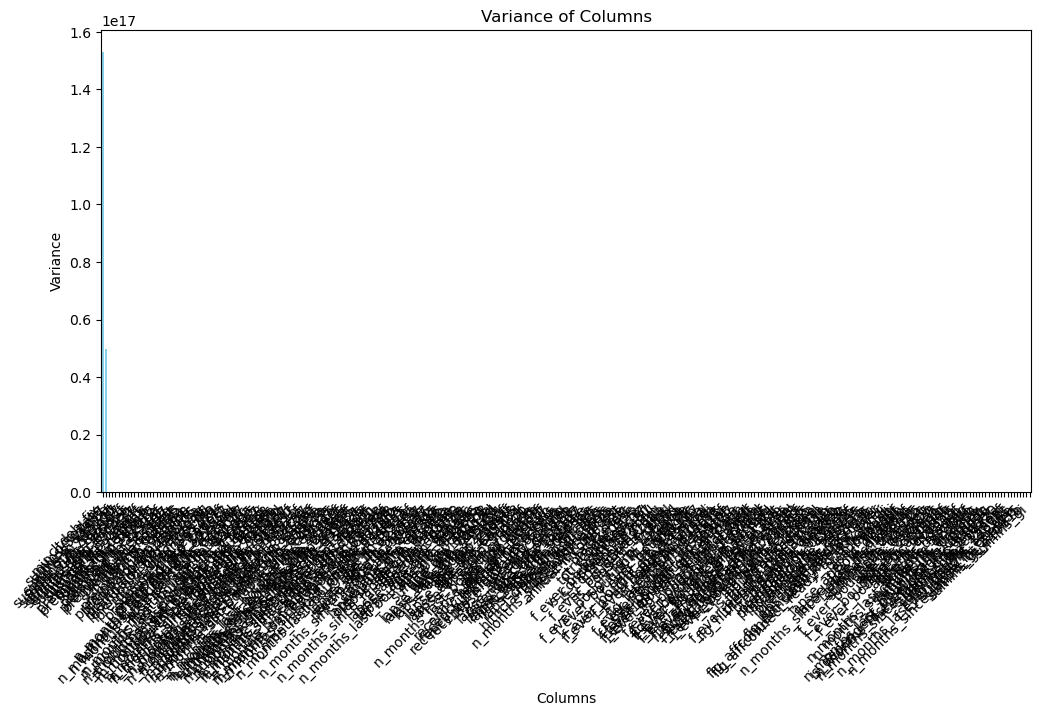

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the variance for each column
variances = numerical_columns.var()
variances_sorted = variances.sort_values(ascending=False)
# Create a bar plot
plt.figure(figsize=(12, 6))
variances_sorted.plot(kind='bar', color='skyblue')
plt.title('Variance of Columns')
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
print("median var: ", variances.median())
print("45 percentile var: ", variances.quantile(0.45))
print("40 percentile varr: ", variances.quantile(0.40))
print("35 percentile var: ", variances.quantile(0.35))
print("30 percentile var: ", variances.quantile(0.3))
print("lower quartile var: ", variances.quantile(0.25))

median var:  1110.4548973247688
45 percentile var:  11.185001200081537
40 percentile varr:  0.21965868475034978
35 percentile var:  0.13397666670892766
30 percentile var:  0.043262236292439124
lower quartile var:  0.007465914566704007


In [16]:
below_threshold_count = (variances < 0.05).sum()

# Calculate the percentage
percentage_below_threshold = (below_threshold_count / len(variances)) * 100
percentage_below_threshold

30.612244897959183

correlation matrices

In [17]:
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Extract the correlation of each independent variable with the target variable
correlation_with_target = correlation_matrix['f_purchase_lh'].drop('f_purchase_lh')

# Display the correlation of each independent variable with the target variable
print("\nCorrelation with Target_Var:")
print(correlation_with_target)

Correlation Matrix:
                                   race_desc  ctrycode_desc   clttype  stat_flag  min_occ_date  cltdob_fix  cltsex_fix  flg_substandard  flg_is_borderline_standard  flg_is_revised_term  flg_is_rental_flat  flg_has_health_claim  flg_has_life_claim  flg_gi_claim  flg_is_proposal  flg_with_preauthorisation  flg_is_returned_mail  is_consent_to_mail  is_consent_to_email  is_consent_to_call  is_consent_to_sms  is_valid_dm  is_valid_email  is_housewife_retiree  is_sg_pr  is_class_1_2  is_dependent_in_at_least_1_policy  f_ever_declined_la     hh_20    pop_20   hh_size  hh_size_est  annual_income_est  n_months_last_bought_products  flg_latest_being_lapse  flg_latest_being_cancel  recency_lapse  recency_cancel  tot_inforce_pols  tot_cancel_pols  ape_gi_42e115  ape_ltc_1280bf  ape_grp_6fc3e6  ape_grp_de05ae  ape_inv_dcd836  ape_grp_945b5a  ape_grp_6a5788  ape_ltc_43b9d5  ape_grp_9cdedf  ape_lh_d0adeb  ape_grp_1581d7  ape_grp_22decf  ape_lh_507c37  ape_lh_839f8a  ape_inv_e9f316

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

target_column = "f_purchase_lh"

# Split the data into features and target variable
X = numerical_columns
y = df[target_column]

# Identify numeric columns
numeric_cols = X.select_dtypes(include=['number']).columns

# Subset the DataFrame to include only numeric columns
X_numeric = X[numeric_cols]

# Split the data into training and validation sets

# Initialize the VarianceThreshold with a threshold value (adjust as needed)
variance_threshold = 0
selector = VarianceThreshold(threshold=variance_threshold)

# Fit and transform on the training set
X_train_filtered = selector.fit_transform(X_numeric)

# Get the selected features
selected_features = X_numeric.columns[selector.get_support()]

# Display or use the filtered DataFrames
print(X_train_filtered)
print("Selected Features:", selected_features)
print("num of numerical cols left: ", len(selected_features))

[[0.00000e+00 1.60000e+01 2.00000e+00 ...         nan         nan
          nan]
 [0.00000e+00 1.60000e+01 2.00000e+00 ...         nan         nan
          nan]
 [3.00000e+00 1.60000e+01 2.00000e+00 ...         nan         nan
          nan]
 ...
 [        nan 1.60000e+01 0.00000e+00 ...         nan         nan
          nan]
 [        nan 1.60000e+01 0.00000e+00 ...         nan 8.00002e+03
  4.80000e+01]
 [        nan 1.60000e+01 0.00000e+00 ...         nan         nan
          nan]]
Selected Features: Index(['race_desc', 'ctrycode_desc', 'clttype', 'stat_flag', 'min_occ_date', 'cltdob_fix', 'cltsex_fix', 'flg_substandard', 'flg_is_borderline_standard', 'flg_is_revised_term',
       ...
       'hlthclaim_amt', 'recency_hlthclaim', 'hlthclaim_cnt_success', 'recency_hlthclaim_success', 'hlthclaim_cnt_unsuccess', 'recency_hlthclaim_unsuccess', 'recency_hlthclaim_839f8a', 'recency_hlthclaim_14cb37', 'giclaim_amt', 'recency_giclaim'], dtype='object', length=231)
num of numerical cols lef

Concatenating numerical and non-numerical columns

In [19]:
numerical_columns = numerical_columns[selected_features.tolist()]
df = pd.concat([numerical_columns, non_numerical_cols], axis=1)
len(df.columns)

241

Dropping columns that are less than 50% filled

In [20]:
threshold = 0.5 * len(df)  # Set the threshold to 50% of the rows

# Loop through each column
for col in df.columns.tolist():
    # Specify the condition for a subset of rows
    condition = (df["f_purchase_lh"] == 1) & (df[col].notna())
    
    # Calculate the ratio of non-null values in the column for the subset of rows
    ratio = len(df[condition]) / len(df[df["f_purchase_lh"] == 1])
    
    # Drop the column if more than 50% of rows are empty and the ratio is less than 0.5
    if (df[col].isna().sum() > threshold) and (ratio < 0.5):
        df = df.drop(columns=[col])
len(df.columns)

215

Drop client number

In [21]:
df.drop("clntnum", axis=1, inplace=True)

Correlation heatmap

Text(0.5, 1.0, 'correlation between features')

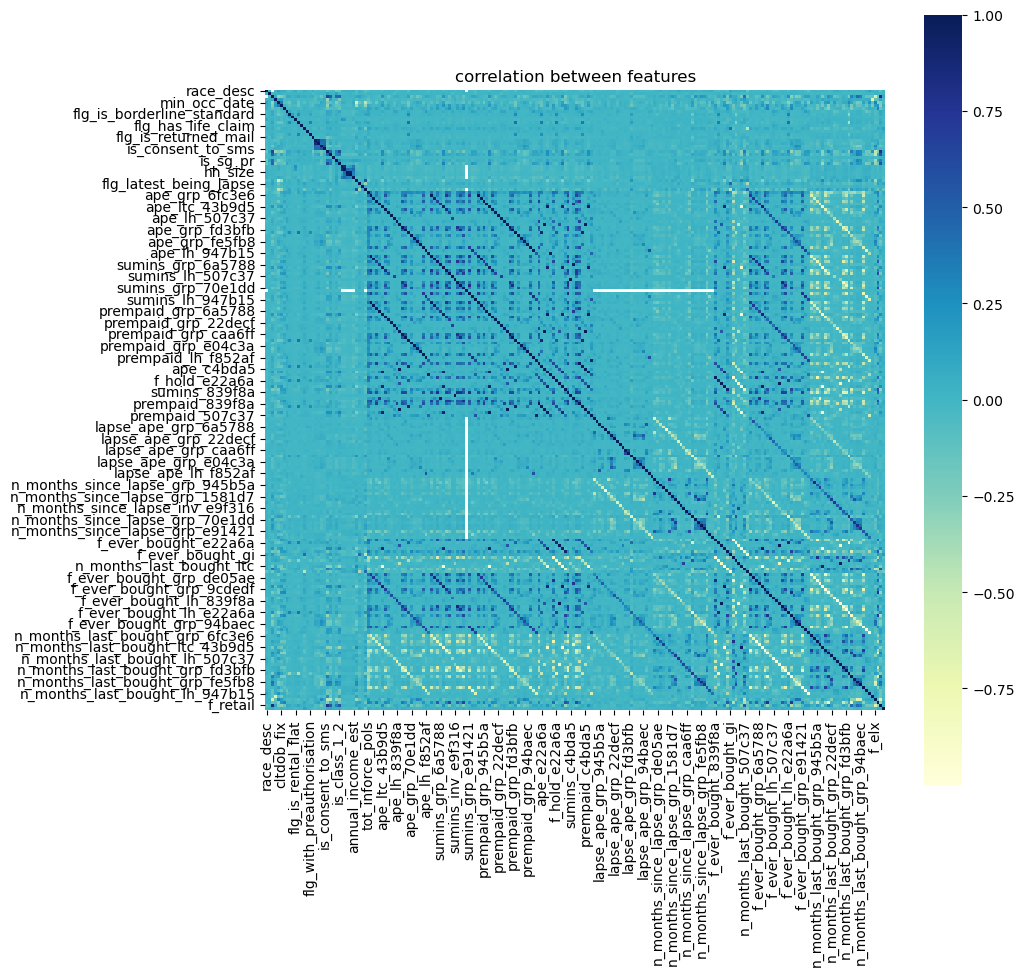

In [22]:
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, cmap="YlGnBu")
plt.title("correlation between features")

In [23]:
tar_col = df["f_purchase_lh"]
non_tar_col = df.drop("f_purchase_lh", axis=1)

In [24]:
# import pandas as pd

threshold = -2  # Set your desired correlation threshold here

# Calculate the correlation matrix
correlation_matrix = non_tar_col.corr().abs()

# Create a mask for upper triangle of the correlation matrix

mask = ~pd.DataFrame(np.triu(np.ones(correlation_matrix.shape), k=1), columns=correlation_matrix.columns, index=correlation_matrix.index).astype(bool)

# Identify pairs of highly correlated variables
high_corr_pairs = (correlation_matrix > threshold) & mask

# List of columns to drop
columns_to_drop = set()

# Iterate through each column in the DataFrame
for column in correlation_matrix.columns:
    # Find other columns highly correlated with the current column
    correlated_columns = high_corr_pairs[high_corr_pairs[column]].index.tolist()
    
    # If there are correlated columns, drop the one with the highest variance
    if correlated_columns:
        variances = non_tar_col[correlated_columns].var()
        column_to_drop = variances.idxmax()
        columns_to_drop.add(column_to_drop)

# Drop the identified columns
filtered_df = df.drop(columns=columns_to_drop)
filtered_df["f_purchase_lh"] = tar_col
len(filtered_df.columns)

204

In [25]:
numerical_columns = filtered_df.select_dtypes(include=[np.number]).drop("f_purchase_lh", axis=1)
non_numerical_cols = filtered_df.select_dtypes(exclude=[np.number])
non_numerical_cols["f_purchase_lh"] = filtered_df["f_purchase_lh"]

len(numerical_columns.columns)

203

KNN inputer to fill in missing columns

In [26]:
import pandas as pd
from sklearn.impute import KNNImputer

# Replace df with your actual DataFrame name

# Identify columns with missing values
columns_with_missing_values = numerical_columns.columns[numerical_columns.isnull().any()].tolist()

# Create DataFrame for imputation
df_for_imputation = numerical_columns[columns_with_missing_values]

# Initialize KNNImputer
# imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed


# Fit and transform
df_imputed = pd.DataFrame(imputer.fit_transform(df_for_imputation), columns=columns_with_missing_values)

# Update original DataFrame with imputed values
numerical_columns[columns_with_missing_values] = df_imputed

# Print the updated DataFrame
print(numerical_columns)


       race_desc  ctrycode_desc  clttype  stat_flag  min_occ_date  cltsex_fix  flg_substandard  flg_is_borderline_standard  flg_is_revised_term  flg_is_rental_flat  flg_has_health_claim  flg_has_life_claim  flg_gi_claim  flg_is_proposal  flg_with_preauthorisation  flg_is_returned_mail  is_consent_to_mail  is_consent_to_email  is_consent_to_call  is_consent_to_sms  is_valid_dm  is_valid_email  is_housewife_retiree  is_sg_pr  is_class_1_2  hh_20  pop_20   hh_size  hh_size_est  annual_income_est  n_months_last_bought_products  flg_latest_being_lapse  flg_latest_being_cancel  recency_lapse  tot_inforce_pols  ape_grp_6fc3e6  ape_grp_de05ae  ape_grp_945b5a  ape_grp_6a5788  ape_ltc_43b9d5  ape_grp_9cdedf  ape_grp_1581d7  ape_grp_22decf  ape_lh_507c37  ape_lh_839f8a  ape_inv_e9f316  ape_grp_caa6ff  ape_grp_fd3bfb  ape_lh_e22a6a  ape_grp_70e1dd  ape_grp_e04c3a  ape_grp_fe5fb8  ape_grp_94baec  ape_grp_e91421  ape_lh_f852af  ape_lh_947b15  sumins_grp_6fc3e6  sumins_grp_de05ae  \
0            0.0 

In [27]:
df = pd.concat([numerical_columns, non_numerical_cols], axis=1)

Data balancing using downsampling and SMOTE

In [28]:
df_target_1 = df[df["f_purchase_lh"] == 1]
df_target_0 = df[df["f_purchase_lh"] == 0]

df_target_0_downsample = df_target_0.sample(frac=0.1, random_state=42)
df = pd.concat([df_target_0_downsample, df_target_1], axis=0, ignore_index=True)

In [29]:
X = df.drop(columns="f_purchase_lh").astype(float)
y = df["f_purchase_lh"].astype(float)


In [30]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train.dtype)

print('Before:', Counter(y_train))
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
print('After:', Counter(y_train))

float64
Before: Counter({0.0: 1380, 1.0: 570})
After: Counter({1.0: 1380, 0.0: 1380})


Feature selection using RFE

In [31]:
# # feature selection
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

rfe = RFECV(estimator=DecisionTreeClassifier())
rfe.fit(X_train, y_train)
X_train_selected = rfe.transform(X_train)
X_val_selected = rfe.transform(X_val)

ML model (gradient boosting ) to predict values for target column

In [32]:

from sklearn.ensemble import GradientBoostingClassifier
boosted_clf = GradientBoostingClassifier(n_estimators=35) # try i = 32
boosted_clf.fit(X_train_selected, y_train)
    # print("train accuracy: ", boosted_clf.score(X_train, y_train))
    # print("val accuracy: ", boosted_clf.score(X_val, y_val))

from sklearn import metrics

y_val_pred = boosted_clf.predict(X_val_selected)

f1_macro = metrics.f1_score(y_val, y_val_pred, average='macro')
print(f"F1 Macro Score: {f1_macro}")

F1 Macro Score: 0.7209361431748385


Confusion matrix

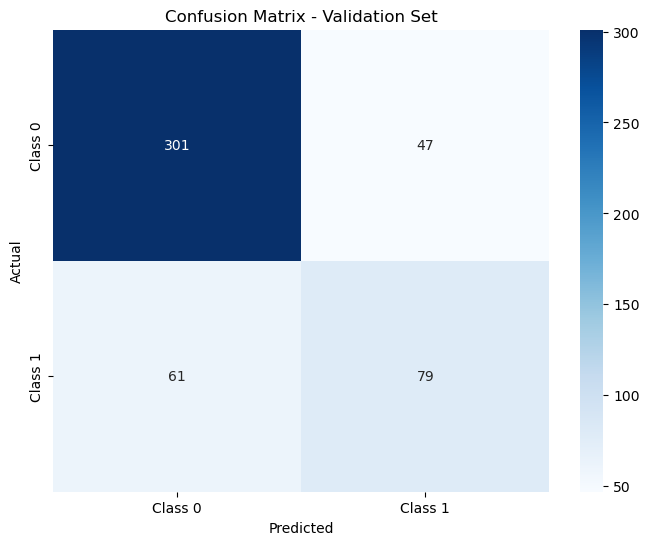

In [33]:
from sklearn.metrics import confusion_matrix, f1_score

y_pred_train = boosted_clf.predict(X_train_selected)
y_pred_val = boosted_clf.predict(X_val_selected)



# Confusion matrix for training set
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [53]:


selected_feature_indices = rfe.support_
selected_column_names = [column_name for (column_name, selected) in zip(X.columns, selected_feature_indices) if selected]

# print("Selected feature indices:", selected_feature_indices)
print("Selected column names:", selected_column_names)


Selected column names: ['race_desc', 'clttype', 'stat_flag', 'min_occ_date', 'cltsex_fix', 'flg_substandard', 'flg_gi_claim', 'flg_is_proposal', 'is_consent_to_mail', 'is_consent_to_email', 'is_consent_to_sms', 'is_valid_dm', 'is_valid_email', 'is_housewife_retiree', 'is_class_1_2', 'hh_20', 'pop_20', 'hh_size', 'hh_size_est', 'annual_income_est', 'n_months_last_bought_products', 'recency_lapse', 'tot_inforce_pols', 'ape_grp_9cdedf', 'sumins_grp_945b5a', 'sumins_ltc_43b9d5', 'sumins_grp_70e1dd', 'sumins_lh_f852af', 'sumins_lh_947b15', 'prempaid_ltc_43b9d5', 'prempaid_grp_22decf', 'prempaid_lh_839f8a', 'prempaid_lh_e22a6a', 'prempaid_grp_94baec', 'prempaid_lh_f852af', 'ape_507c37', 'lapse_ape_grp_6fc3e6', 'lapse_ape_grp_945b5a', 'lapse_ape_grp_22decf', 'lapse_ape_lh_507c37', 'lapse_ape_inv_e9f316', 'lapse_ape_lh_e22a6a', 'lapse_ape_grp_94baec', 'lapse_ape_lh_f852af', 'n_months_since_lapse_grp_6fc3e6', 'n_months_since_lapse_grp_945b5a', 'n_months_since_lapse_grp_9cdedf', 'n_months_since_

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [54]:
def testing_hidden_data(hidden_data: pd.DataFrame   ) -> list:
    df = hidden_data
    df["min_occ_date"] = pd.to_datetime(df["min_occ_date"], format="%Y-%m-%d", errors="coerce")
    df["cltdob_fix"] = pd.to_datetime(df["cltdob_fix"], format="%Y-%m-%d", errors="coerce")

    df["hh_20"] = pd.to_numeric(df["hh_20"], errors='coerce')
    df["hh_20"] = df["hh_20"].astype('Int64')

    df["pop_20"] = pd.to_numeric(df["pop_20"], errors='coerce')
    df["pop_20"] = df["pop_20"].astype('Int64')

    df["hh_size_est"] = pd.to_numeric(df["hh_size_est"], errors='coerce')
    df["hh_size_est"] = df["hh_size_est"].astype('Int64')

    prod_cols = ['ape_gi_42e115',
    'ape_ltc_1280bf',
    'ape_grp_6fc3e6',
    'ape_grp_de05ae',
    'ape_inv_dcd836',
    'ape_grp_945b5a',
    'ape_grp_6a5788',
    'ape_ltc_43b9d5',
    'ape_grp_9cdedf',
    'ape_lh_d0adeb',
    'ape_grp_1581d7',
    'ape_grp_22decf',
    'ape_lh_507c37',
    'ape_lh_839f8a',
    'ape_inv_e9f316',
    'ape_gi_a10d1b',
    'ape_gi_29d435',
    'ape_grp_caa6ff',
    'ape_grp_fd3bfb',
    'ape_lh_e22a6a',
    'ape_grp_70e1dd',
    'ape_grp_e04c3a',
    'ape_grp_fe5fb8',
    'ape_gi_856320',
    'ape_grp_94baec',
    'ape_gi_058815',
    'ape_grp_e91421',
    'ape_lh_f852af',
    'ape_lh_947b15',
    'ape_32c74c',
    'sumins_gi_42e115',
    'sumins_ltc_1280bf',
    'sumins_grp_6fc3e6',
    'sumins_grp_de05ae',
    'sumins_inv_dcd836',
    'sumins_grp_945b5a',
    'sumins_grp_6a5788',
    'sumins_ltc_43b9d5',
    'sumins_grp_9cdedf',
    'sumins_lh_d0adeb',
    'sumins_grp_1581d7',
    'sumins_grp_22decf',
    'sumins_lh_507c37',
    'sumins_inv_e9f316',
    'sumins_gi_a10d1b',
    'sumins_gi_29d435',
    'sumins_grp_caa6ff',
    'sumins_grp_fd3bfb',
    'sumins_lh_e22a6a',
    'sumins_grp_70e1dd',
    'sumins_grp_e04c3a',
    'sumins_grp_fe5fb8',
    'sumins_gi_856320',
    'sumins_grp_94baec',
    'sumins_gi_058815',
    'sumins_grp_e91421',
    'sumins_lh_f852af',
    'sumins_lh_947b15',
    'sumins_32c74c',
    'prempaid_gi_42e115',
    'prempaid_ltc_1280bf',
    'prempaid_grp_6fc3e6',
    'prempaid_grp_de05ae',
    'prempaid_inv_dcd836',
    'prempaid_grp_945b5a',
    'prempaid_grp_6a5788',
    'prempaid_ltc_43b9d5',
    'prempaid_grp_9cdedf',
    'prempaid_lh_d0adeb',
    'prempaid_grp_1581d7',
    'prempaid_grp_22decf',
    'prempaid_lh_507c37',
    'prempaid_lh_839f8a',
    'prempaid_inv_e9f316',
    'prempaid_gi_a10d1b',
    'prempaid_gi_29d435',
    'prempaid_grp_caa6ff',
    'prempaid_grp_fd3bfb',
    'prempaid_lh_e22a6a',
    'prempaid_grp_70e1dd',
    'prempaid_grp_e04c3a',
    'prempaid_grp_fe5fb8',
    'prempaid_gi_856320',
    'prempaid_grp_94baec',
    'prempaid_gi_058815',
    'prempaid_grp_e91421',
    'prempaid_lh_f852af',
    'prempaid_lh_947b15',
    'prempaid_32c74c',
    'ape_839f8a',
    'ape_e22a6a',
    'ape_d0adeb',
    'ape_c4bda5',
    'ape_ltc',
    'ape_507c37',
    'ape_gi',
    'f_hold_839f8a',
    'f_hold_e22a6a',
    'f_hold_d0adeb',
    'f_hold_c4bda5',
    'f_hold_ltc',
    'f_hold_507c37',
    'f_hold_gi',
    'sumins_839f8a',
    'sumins_e22a6a',
    'sumins_d0adeb',
    'sumins_c4bda5',
    'sumins_ltc',
    'sumins_507c37',
    'sumins_gi',
    'prempaid_839f8a',
    'prempaid_e22a6a',
    'prempaid_d0adeb',
    'prempaid_c4bda5',
    'prempaid_ltc',
    'prempaid_507c37',
    'prempaid_gi',
    'lapse_ape_ltc_1280bf',
    'lapse_ape_grp_6fc3e6',
    'lapse_ape_grp_de05ae',
    'lapse_ape_inv_dcd836',
    'lapse_ape_grp_945b5a',
    'lapse_ape_grp_6a5788',
    'lapse_ape_ltc_43b9d5',
    'lapse_ape_grp_9cdedf',
    'lapse_ape_lh_d0adeb',
    'lapse_ape_grp_1581d7',
    'lapse_ape_grp_22decf',
    'lapse_ape_lh_507c37',
    'lapse_ape_lh_839f8a',
    'lapse_ape_inv_e9f316',
    'lapse_ape_grp_caa6ff',
    'lapse_ape_grp_fd3bfb',
    'lapse_ape_lh_e22a6a',
    'lapse_ape_grp_70e1dd',
    'lapse_ape_grp_e04c3a',
    'lapse_ape_grp_fe5fb8',
    'lapse_ape_grp_94baec',
    'lapse_ape_grp_e91421',
    'lapse_ape_lh_f852af',
    'lapse_ape_lh_947b15',
    'lapse_ape_32c74c',
    ] 

    df[prod_cols] = df[prod_cols].astype('float64')
    df[["recency_lapse", "recency_cancel", "tot_inforce_pols"]] = df[["recency_lapse", "recency_cancel", "tot_inforce_pols"]].apply(pd.to_numeric, errors='coerce')
    df[["recency_lapse", "recency_cancel", "tot_inforce_pols"]] = df[["recency_lapse", "recency_cancel", "tot_inforce_pols"]].astype('Int64')



    ordinal_cols = ['annual_income_est', 'race_desc',
    'ctrycode_desc',
    'clttype',
    'stat_flag', 
    'cltsex_fix']

    def encode_column_with_missing_values(df, column_name):
        # Extract rows with missing values in the specified column
        df_missing = df[df[column_name].isna()]

        # Drop rows with missing values in the specified column
        df_cleaned = df.dropna(subset=[column_name])

        # Extract and encode the specified column
        column_to_encode = df_cleaned[[column_name]]
        oe = OrdinalEncoder()
        column_encoded = oe.fit_transform(column_to_encode)
        df_cleaned[column_name] = column_encoded

        # Concatenate the two parts back together
        df_result = pd.concat([df_cleaned, df_missing], ignore_index=True)

        return df_result

    for col in ordinal_cols:
        df = encode_column_with_missing_values(df, col)


    df = df.infer_objects()

    cols_145_to_158 = ['sumins_839f8a',
    'sumins_e22a6a',
    'sumins_d0adeb',
    'sumins_c4bda5',
    'sumins_ltc',
    'sumins_507c37',
    'sumins_gi',
    'prempaid_839f8a',
    'prempaid_e22a6a',
    'prempaid_d0adeb',
    'prempaid_c4bda5',
    'prempaid_ltc',
    'prempaid_507c37',
    'prempaid_gi']

    df[cols_145_to_158] = df[cols_145_to_158].apply(pd.to_numeric, errors='coerce')
    df[cols_145_to_158] = df[cols_145_to_158].astype(float)

    cols_months_snce_bought = [ 'n_months_since_lapse_ltc_1280bf',
    'n_months_since_lapse_grp_6fc3e6',
    'n_months_since_lapse_grp_de05ae',
    'n_months_since_lapse_inv_dcd836',
    'n_months_since_lapse_grp_945b5a',
    'n_months_since_lapse_grp_6a5788',
    'n_months_since_lapse_ltc_43b9d5',
    'n_months_since_lapse_grp_9cdedf',
    'n_months_since_lapse_lh_d0adeb',
    'n_months_since_lapse_grp_1581d7',
    'n_months_since_lapse_grp_22decf',
    'n_months_since_lapse_lh_507c37',
    'n_months_since_lapse_lh_839f8a',
    'n_months_since_lapse_inv_e9f316',
    'n_months_since_lapse_grp_caa6ff',
    'n_months_since_lapse_grp_fd3bfb',
    'n_months_since_lapse_lh_e22a6a',
    'n_months_since_lapse_grp_70e1dd',
    'n_months_since_lapse_grp_e04c3a',
    'n_months_since_lapse_grp_fe5fb8',
    'n_months_since_lapse_grp_94baec',
    'n_months_since_lapse_grp_e91421',
    'n_months_since_lapse_lh_f852af',
    'n_months_since_lapse_lh_947b15',
    'n_months_since_lapse_32c74c', 
    'n_months_last_bought_839f8a',
    'n_months_last_bought_e22a6a',
    'n_months_last_bought_d0adeb',
    'n_months_last_bought_c4bda5',
    'n_months_last_bought_ltc',
    'n_months_last_bought_507c37',
    'n_months_last_bought_gi',
    'n_months_last_bought_ltc_1280bf',
    'n_months_last_bought_grp_6fc3e6',
    'n_months_last_bought_grp_de05ae',
    'n_months_last_bought_inv_dcd836',
    'n_months_last_bought_grp_945b5a',
    'n_months_last_bought_grp_6a5788',
    'n_months_last_bought_ltc_43b9d5',
    'n_months_last_bought_grp_9cdedf',
    'n_months_last_bought_lh_d0adeb',
    'n_months_last_bought_grp_1581d7',
    'n_months_last_bought_grp_22decf',
    'n_months_last_bought_lh_507c37',
    'n_months_last_bought_lh_839f8a',
    'n_months_last_bought_inv_e9f316',
    'n_months_last_bought_grp_caa6ff',
    'n_months_last_bought_grp_fd3bfb',
    'n_months_last_bought_lh_e22a6a',
    'n_months_last_bought_grp_70e1dd',
    'n_months_last_bought_grp_e04c3a',
    'n_months_last_bought_grp_fe5fb8',
    'n_months_last_bought_grp_94baec',
    'n_months_last_bought_grp_e91421',
    'n_months_last_bought_lh_f852af',
    'n_months_last_bought_lh_947b15',
    'n_months_last_bought_32c74c']

    df[cols_months_snce_bought] = df[cols_months_snce_bought].apply(pd.to_numeric, errors='coerce')
    df[cols_months_snce_bought] = df[cols_months_snce_bought].astype('Int64')



    col_276_283 = [
        'flg_affconnect_show_interest_ever',
    'flg_affconnect_ready_to_buy_ever',
    'flg_affconnect_lapse_ever',
    'affcon_visit_days',
    'n_months_since_visit_affcon',
    'clmcon_visit_days',
    'recency_clmcon',
    'recency_clmcon_regis', 
    ]

    df[col_276_283] = df[col_276_283].apply(pd.to_numeric, errors='coerce')
    df[col_276_283] = df[col_276_283].astype('Int64')

    df['hlthclaim_amt'] = df['hlthclaim_amt'].apply(pd.to_numeric, errors='coerce')
    df['hlthclaim_amt'] = df['hlthclaim_amt'].astype(float) #284

    df["giclaim_amt"] = df["giclaim_amt"].apply(pd.to_numeric, errors='coerce')
    df["giclaim_amt"] = df["giclaim_amt"].astype(float)
    #df["f_purchase_lh"] = df["f_purchase_lh"].apply') #294

    df['min_occ_date'] = pd.to_datetime(df['min_occ_date'])
    df["min_occ_date"] = (df['min_occ_date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

    df["cltdob_fix"] = pd.to_datetime(df["cltdob_fix"])
    df["cltdob_fix"] = (df["cltdob_fix"] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')




    numerical_columns = df.select_dtypes(include=[np.number])
    non_numerical_cols = df.select_dtypes(exclude=[np.number])



    variances = numerical_columns.var()
    variances_sorted = variances.sort_values(ascending=False)



    correlation_matrix = df.corr(numeric_only=True)



    # Split the data into features and target variable
    X = numerical_columns

    # Identify numeric columns
    numeric_cols = X.select_dtypes(include=['number']).columns

    # Subset the DataFrame to include only numeric columns
    X_numeric = X[numeric_cols]

    # Split the data into training and validation sets

    # Initialize the VarianceThreshold with a threshold value (adjust as needed)
    variance_threshold = 0
    selector = VarianceThreshold(threshold=variance_threshold)

    # Fit and transform on the training set
    X_train_filtered = selector.fit_transform(X_numeric)

    # Get the selected features
    selected_features = X_numeric.columns[selector.get_support()]


    numerical_columns = numerical_columns[selected_features.tolist()]
    df = pd.concat([numerical_columns, non_numerical_cols], axis=1)


    threshold = 0.5 * len(df)  # Set the threshold to 50% of the rows



    df.drop("clntnum", axis=1, inplace=True)


    non_tar_col = df

    threshold = -2  # Set your desired correlation threshold here

    # Calculate the correlation matrix
    correlation_matrix = non_tar_col.corr().abs()

    # Create a mask for upper triangle of the correlation matrix

    mask = ~pd.DataFrame(np.triu(np.ones(correlation_matrix.shape), k=1), columns=correlation_matrix.columns, index=correlation_matrix.index).astype(bool)

    # Identify pairs of highly correlated variables
    high_corr_pairs = (correlation_matrix > threshold) & mask

    # List of columns to drop
    columns_to_drop = set()

    # Iterate through each column in the DataFrame
    for column in correlation_matrix.columns:
        # Find other columns highly correlated with the current column
        correlated_columns = high_corr_pairs[high_corr_pairs[column]].index.tolist()
        
        # If there are correlated columns, drop the one with the highest variance
        if correlated_columns:
            variances = non_tar_col[correlated_columns].var()
            column_to_drop = variances.idxmax()
            columns_to_drop.add(column_to_drop)

    # Drop the identified columns
    filtered_df = df.drop(columns=columns_to_drop)

    filtered_df = filtered_df[selected_column_names]

    numerical_columns = filtered_df.select_dtypes(include=[np.number])
    non_numerical_cols = filtered_df.select_dtypes(exclude=[np.number])


    # Assuming your DataFrame is named df
    # Replace df with your actual DataFrame name

    # Identify columns with missing values
    columns_with_missing_values = numerical_columns.columns[numerical_columns.isnull().any()].tolist()

    # Create DataFrame for imputation
    df_for_imputation = numerical_columns[columns_with_missing_values]

    # Initialize KNNImputer
    # imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
    imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed


    # Fit and transform
    df_imputed = pd.DataFrame(imputer.fit_transform(df_for_imputation), columns=columns_with_missing_values)
    # Update original DataFrame with imputed values
    numerical_columns[columns_with_missing_values] = df_imputed


    df = pd.concat([numerical_columns, non_numerical_cols], axis=1)


    result = boosted_clf.predict(df)

    return result



##### Cell to check testing_hidden_data function

In [55]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

C:\Users\User\AppData\Local\Temp\ipykernel_18572\1316564511.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column_name] = column_encoded
C:\Users\User\AppData\Local\Temp\ipykernel_18572\1316564511.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column_name] = column_encoded
C:\Users\User\AppData\Local\Temp\ipykernel_18572\1316564511.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

[1. 0. 0. ... 1. 1. 0.]


c:\Users\User\anaconda3\envs\testenv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!